In [1]:
import pyodbc
import pandas as pd
import numpy as np
conn=pyodbc.connect("DRIVER={NetezzaSQL};SERVER=1000.500.220.1002; PORT=5480;DATABASE=Mercrryaaury;UID=bmeddfffka1;PWD=nfyssddff1235%")
cus=conn.cursor()
query="select cast(max(starttime) as varchar(100)),cast(max(endtime) as varchar(100)), cast(max(endtime)-max(starttime) as varchar(100)),cast(to_date(extractdate,'YYYYMMDD')+1 as varchar(100)),to_char(to_date(extractdate,'YYYYMMDD')+1,'DAY') ,package from(select  max(auditdatetime) starttime,NULL endtime  ,extractdate,package from jobs_auditevent where EXTRACTDATE >=20180101 and description ='Package Started' and  upper (package) like'%TRANS%' group by extractdate,package union select  null starttime,max(auditdatetime)  endtime  ,extractdate,package from jobs_auditevent where EXTRACTDATE  >=20180101 and description ='Package Completed' and  upper (package) like'%TRANS%' group by extractdate,package) a  where to_char(to_date(extractdate,'YYYYMMDD')+1,'DAY') in ('MONDAY','THURSDAY') group by 4,5,6 order by package,1"
cus.execute(query)
recs=cus.fetchall()
df=pd.DataFrame(data=np.array(recs),columns=['START_TIME','END_TIME','TIME_TAKEN','RUN_DATE','RUN_DAY','PROCESS'])

In [2]:
df

,START_TIME,END_TIME,TIME_TAKEN,RUN_DATE,RUN_DAY,PROCESS
0,2018-01-04 10:04:49,2018-01-04 11:15:47,01:10:58,2018-01-04,THURSDAY,AALTransLoad
1,2018-01-08 07:39:24,2018-01-08 08:43:57,01:04:33,2018-01-08,MONDAY,AALTransLoad
2,2018-01-11 06:56:56,2018-01-11 07:32:28,00:35:32,2018-01-11,THURSDAY,AALTransLoad
3,2018-01-15 08:51:19,2018-01-15 09:37:09,00:45:50,2018-01-15,MONDAY,AALTransLoad
4,2018-01-18 15:48:34,2018-01-18 16:00:00,00:11:26,2018-01-18,THURSDAY,AALTransLoad
5,2018-01-22 08:00:49,2018-01-22 08:21:22,00:20:33,2018-01-22,MONDAY,AALTransLoad
6,2018-01-25 13:20:29,2018-01-25 13:32:28,00:11:59,2018-01-25,THURSDAY,AALTransLoad
7,2018-01-29 08:15:58,2018-01-29 08:42:36,00:26:38,2018-01-29,MONDAY,AALTransLoad
8,2018-02-01 07:38:46,2018-02-01 07:50:50,00:12:04,2018-02-01,THURSDAY,AALTransLoad
9,2018-02-05 07:22:42,2018-02-05 07:36:30,00:13:48,2018-02-05,MONDAY,AALTransLoad


In [3]:
TIME=pd.DataFrame(data=df.TIME_TAKEN.str.split(':').tolist(),columns=['A','B','C']).astype(int)

In [4]:
TIME['mins']=TIME['A']*60+TIME['B']+TIME['C']/60

In [7]:
TIME[['process','date']]=df[['PROCESS','RUN_DATE']]

In [30]:
TIME['Hours']=TIME['A']+TIME['B']/60+TIME['C']/120


In [31]:
TIME

,A,B,C,mins,process,date,Hours
0,1,10,58,70.966667,AALTransLoad,2018-01-04,1.650000
1,1,4,33,64.550000,AALTransLoad,2018-01-08,1.341667
2,0,35,32,35.533333,AALTransLoad,2018-01-11,0.850000
3,0,45,50,45.833333,AALTransLoad,2018-01-15,1.166667
4,0,11,26,11.433333,AALTransLoad,2018-01-18,0.400000
5,0,20,33,20.550000,AALTransLoad,2018-01-22,0.608333
6,0,11,59,11.983333,AALTransLoad,2018-01-25,0.675000
7,0,26,38,26.633333,AALTransLoad,2018-01-29,0.750000
8,0,12,4,12.066667,AALTransLoad,2018-02-01,0.233333
9,0,13,48,13.800000,AALTransLoad,2018-02-05,0.616667


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

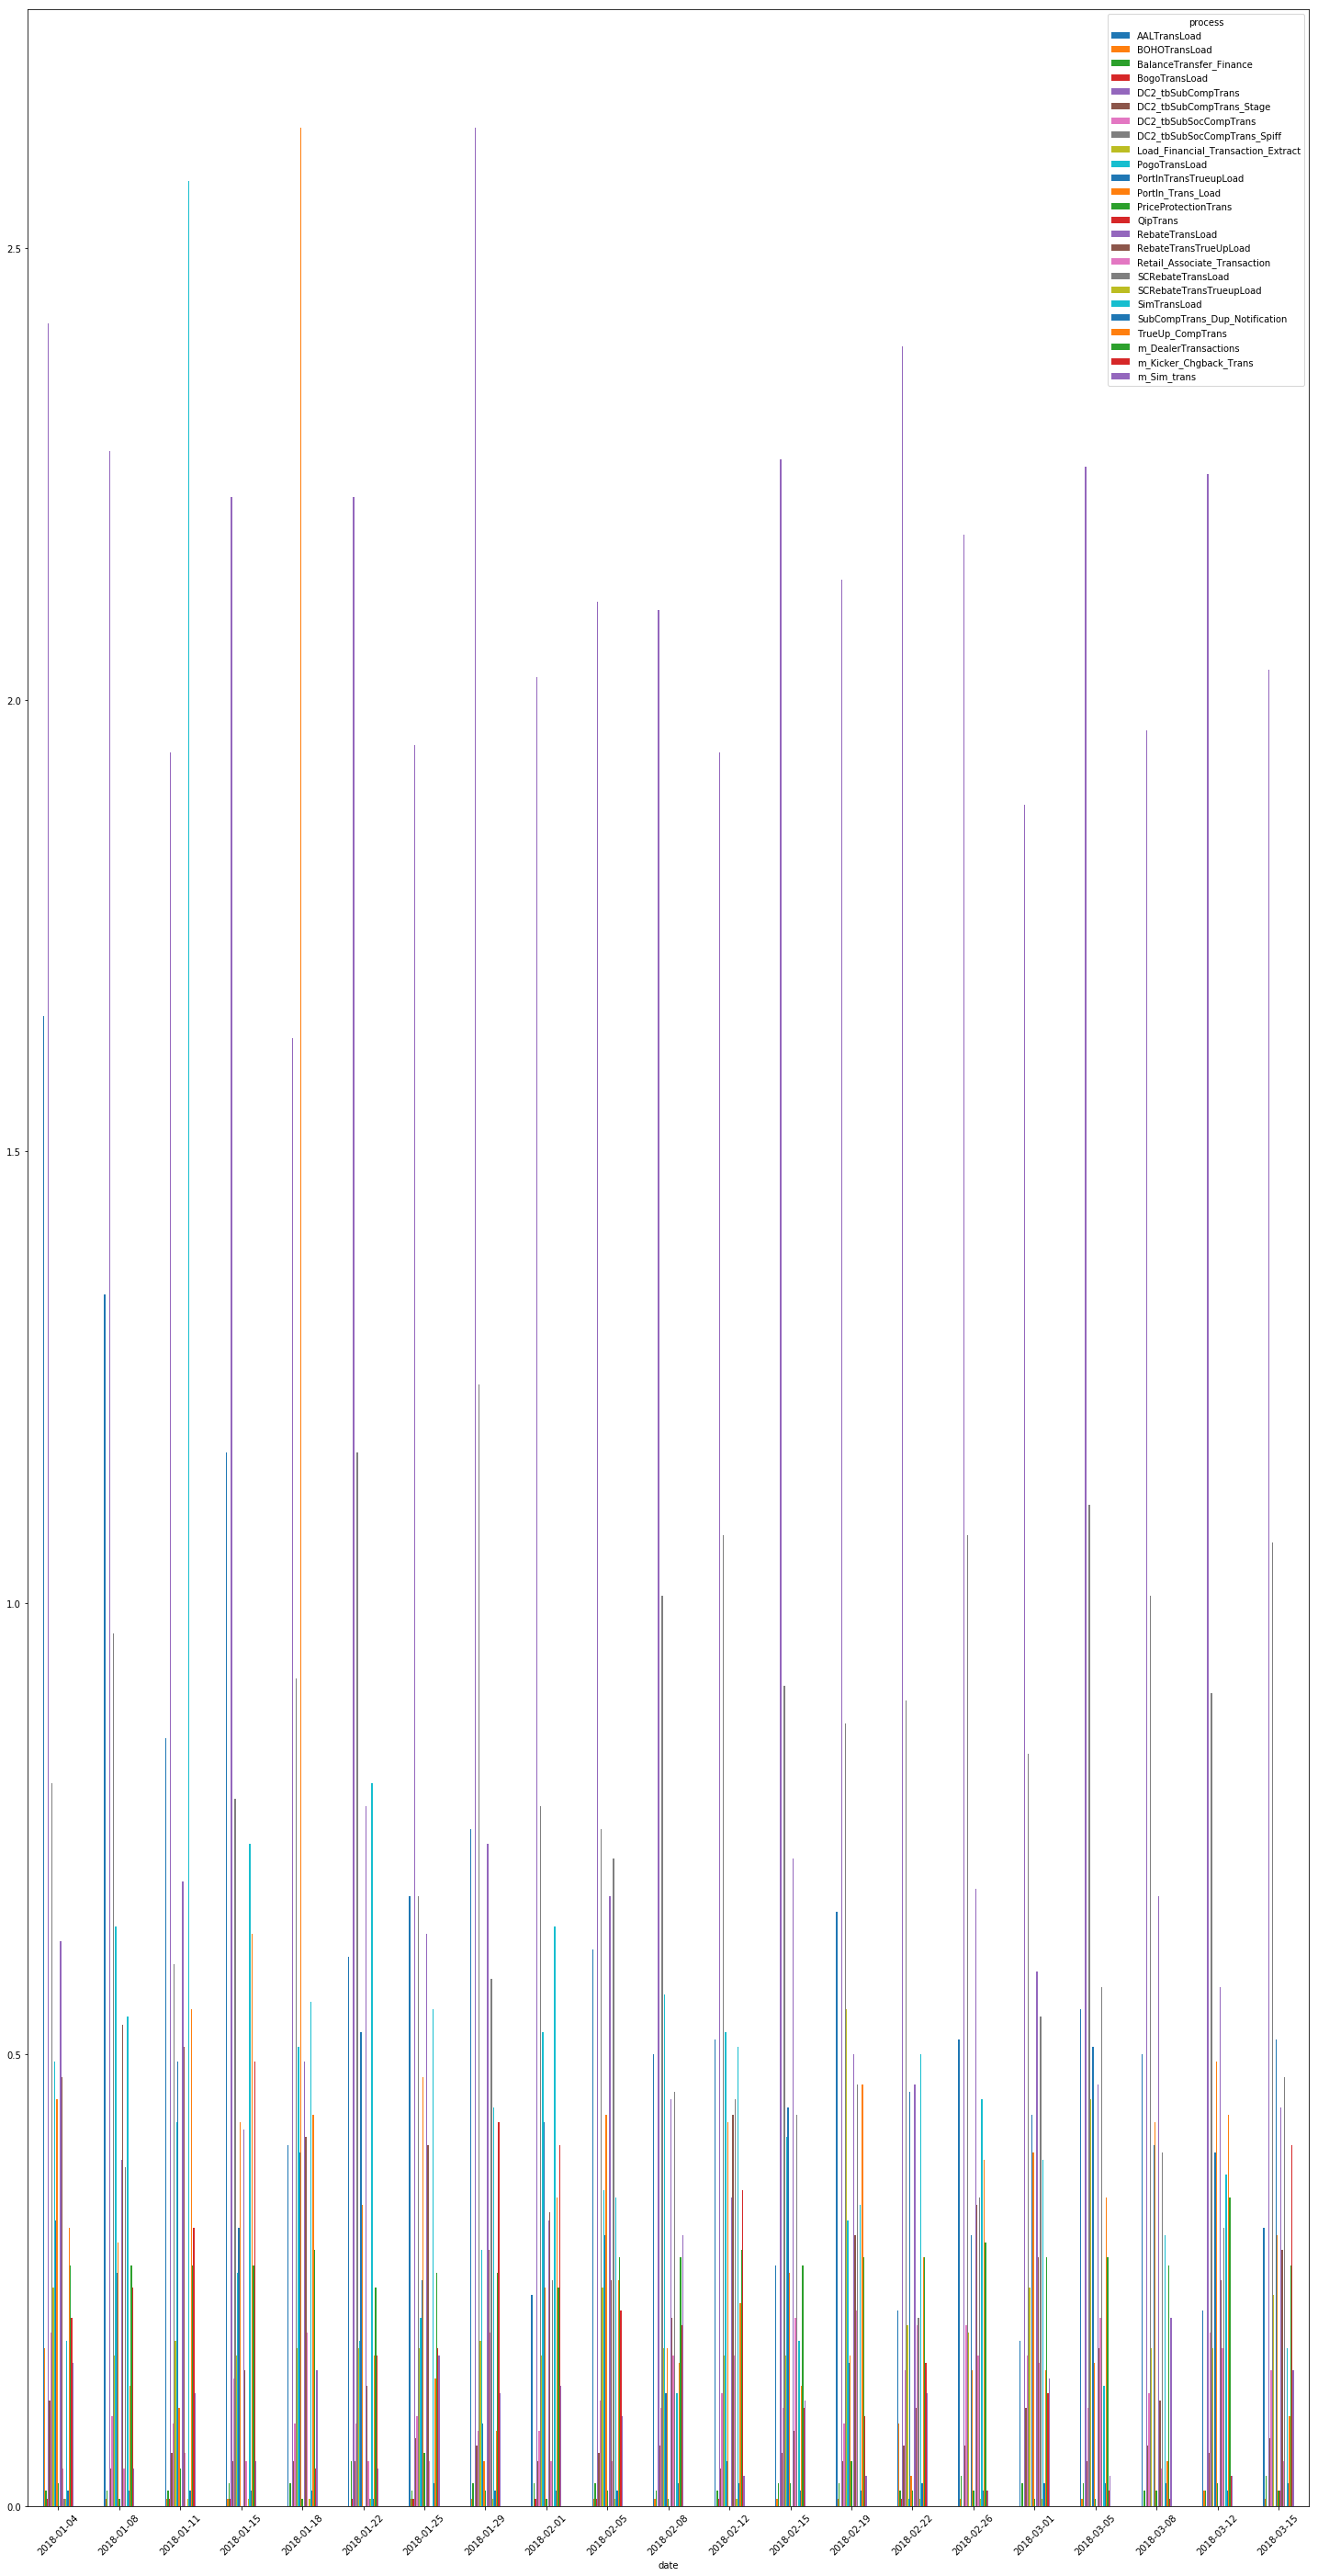

In [59]:
TIME.pivot(index='date',columns='process',values='Hours').plot(kind='bar',figsize=(25,50))
plt.xticks(rotation=45,visible=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

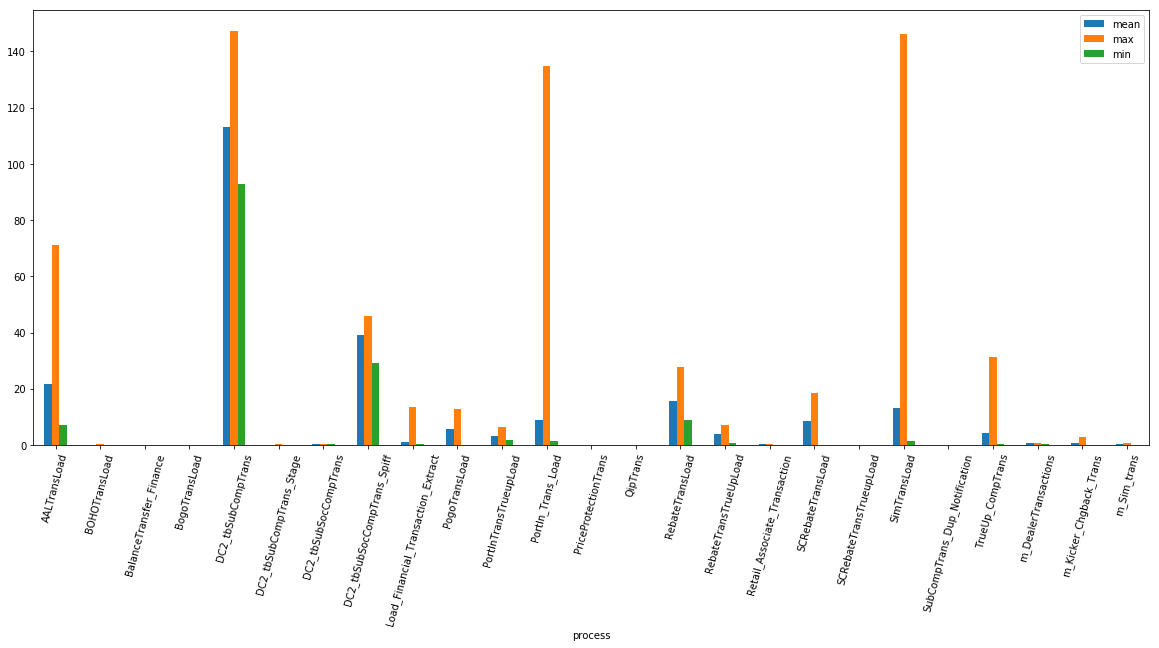

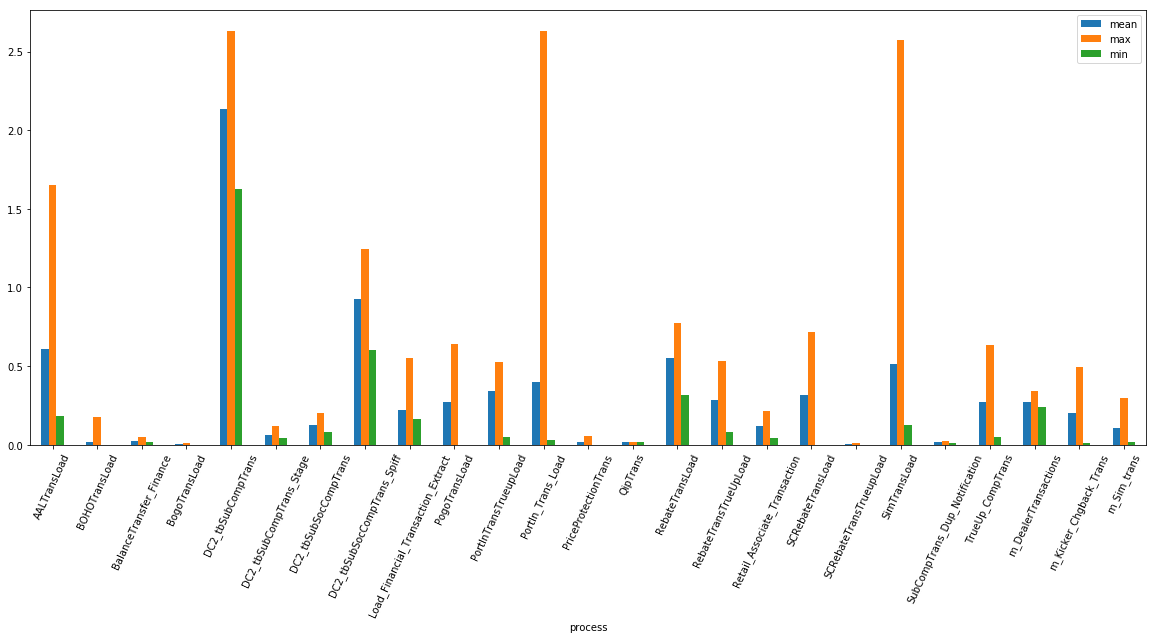

In [39]:
import matplotlib.pyplot as plt

TIME.groupby('process').mins.agg(['mean','max','min']).plot(kind='bar',figsize=(20, 8))
plt.xticks(rotation=75)
TIME.groupby('process').Hours.agg(['mean','max','min']).plot(kind='bar',figsize=(20, 8))
plt.xticks(rotation=65)
TIME.plot(x=TIME['date'],)

